In [25]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axis as axis

from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.formula.api as smf





sns.set(font_scale=1.25)
plt.style.use('seaborn-white')

<ipython-input-25-e3913e093b73>:22: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [26]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/dataframe1.csv'
df = pd.read_csv(file_path)
df.columns
df.drop("Date", axis = 1)
df2= df[['PNL', 'Volume']]
df3= df[['PNL', 'Range']]
df4 = df[['Date', 'PNL', 
       'STD_G', 'STD_Sum', 'STD_Total', 'STD_Diff', 'Open_Vol',
       'Perc_Change_Vol', 'Perc_Change_Price', 'Volume', 'Open_Int', 'Range']]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Index(['Date', 'PNL', 'STD_A', 'STD_B', 'STD_C', 'STD_D', 'STD_E', 'STD_F',
       'STD_G', 'STD_Sum', 'STD_Total', 'STD_Diff', 'Open_Vol',
       'Perc_Change_Vol', 'Perc_Change_Price', 'Volume', 'Open_Int', 'Range',
       'High_Diff', 'High_Vol', 'High_PC_Price', 'High_PC_Vol'],
      dtype='object')

,PNL,STD_A,STD_B,STD_C,STD_D,STD_E,STD_F,STD_G,STD_Sum,STD_Total,...,Open_Vol,Perc_Change_Vol,Perc_Change_Price,Volume,Open_Int,Range,High_Diff,High_Vol,High_PC_Price,High_PC_Vol
0,-87826.0,86468.498575,10878.838940,12334.135120,2815.128735,34893.760498,1074.230010,124562.410578,273027.002457,208302.922302,...,37.12,0.87,1.46,443900.0,1886091.0,2.16,0,0,1.0,0.0
1,21268.0,91845.330007,94278.580341,9297.392074,3480.016427,34194.618568,21482.950192,121529.229587,376108.117196,230086.858942,...,38.27,5.64,2.70,704355.0,1881769.0,2.99,1,0,1.0,1.0
2,262982.0,94350.688837,21781.236370,8312.541272,642.888822,25922.699592,13779.058313,118436.921858,283226.035064,219589.530555,...,40.67,3.80,0.62,784946.0,1880445.0,1.25,0,0,0.0,1.0
3,-175431.0,114380.248146,16358.357476,19714.508052,2564.716941,34678.939436,9706.071673,118254.557267,315657.398990,228701.656093,...,36.96,7.12,3.59,1084446.0,1862150.0,3.88,0,0,1.0,1.0
4,44683.0,111122.888951,13866.942816,9517.710606,5498.290892,27595.620454,5983.076914,118929.949403,292514.480036,209646.713894,...,33.85,6.88,2.15,784520.0,1826195.0,2.57,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,-9212.0,159006.389726,16439.713255,5539.028234,6858.943954,17327.079776,3708.303937,246039.066881,454918.525762,336305.010981,...,36.86,0.38,0.36,979709.0,1918425.0,1.03,1,0,0.0,0.0
328,-155963.0,133102.043044,19114.299087,4241.599255,4516.749839,18645.720738,3701.869965,201477.474601,384799.756528,258774.805179,...,44.49,17.15,0.78,1170432.0,1913391.0,1.99,1,0,0.0,1.0
329,-130371.0,93783.326495,16130.048692,2284.753960,2403.311996,24296.427786,3608.884891,191750.646166,334257.399986,222386.049450,...,39.48,12.69,0.06,989697.0,1901975.0,1.22,1,0,0.0,1.0
330,35314.0,92013.490154,19061.987667,3007.815489,1289.283921,23963.530510,3569.635007,194111.365264,337017.108012,242245.463225,...,37.57,5.08,1.38,852063.0,1887131.0,1.37,0,0,0.0,1.0


<Axes: xlabel='Open_Vol', ylabel='STD_A'>

(-20.0, 50.0)

(0.0, 500000.0)

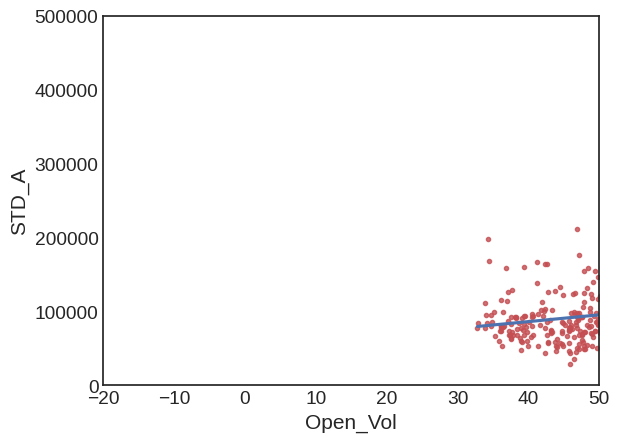

In [27]:
sns.regplot(x = df['Open_Vol'], y = df['STD_A'], order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-20,50)
plt.ylim(0,500000)

In [28]:
import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(30,700))

k = 0
for INDEX, i in enumerate(df4.columns):
    for index,j in enumerate(df4.columns):
        k = k+1
        fig1.add_subplot(324,4,k)
        plt.title(str(i)+'/'+str(j))
        plt.scatter(df[i],df[j])

    
plt.subplots_adjust(hspace=0.4,wspace=0.5)
plt.savefig('pairplots.png')
plt.show()

<Axes: >

Text(0.5, 1.0, 'Date/Date')

<Axes: >

Text(0.5, 1.0, 'Date/PNL')

<Axes: >

Text(0.5, 1.0, 'Date/STD_G')

<Axes: >

Text(0.5, 1.0, 'Date/STD_Sum')

<Axes: >

Text(0.5, 1.0, 'Date/STD_Total')

<Axes: >

Text(0.5, 1.0, 'Date/STD_Diff')

<Axes: >

Text(0.5, 1.0, 'Date/Open_Vol')

<Axes: >

Text(0.5, 1.0, 'Date/Perc_Change_Vol')

<Axes: >

Text(0.5, 1.0, 'Date/Perc_Change_Price')

<Axes: >

Text(0.5, 1.0, 'Date/Volume')

<Axes: >

Text(0.5, 1.0, 'Date/Open_Int')

<Axes: >

Text(0.5, 1.0, 'Date/Range')

<Axes: >

Text(0.5, 1.0, 'PNL/Date')

<Axes: >

Text(0.5, 1.0, 'PNL/PNL')

<Axes: >

Text(0.5, 1.0, 'PNL/STD_G')

<Axes: >

Text(0.5, 1.0, 'PNL/STD_Sum')

<Axes: >

Text(0.5, 1.0, 'PNL/STD_Total')

<Axes: >

Text(0.5, 1.0, 'PNL/STD_Diff')

<Axes: >

Text(0.5, 1.0, 'PNL/Open_Vol')

<Axes: >

Text(0.5, 1.0, 'PNL/Perc_Change_Vol')

<Axes: >

Text(0.5, 1.0, 'PNL/Perc_Change_Price')

<Axes: >

Text(0.5, 1.0, 'PNL/Volume')

<Axes: >

Text(0.5, 1.0, 'PNL/Open_Int')

<Axes: >

Text(0.5, 1.0, 'PNL/Range')

<Axes: >

Text(0.5, 1.0, 'STD_G/Date')

<Axes: >

Text(0.5, 1.0, 'STD_G/PNL')

<Axes: >

Text(0.5, 1.0, 'STD_G/STD_G')

<Axes: >

Text(0.5, 1.0, 'STD_G/STD_Sum')

<Axes: >

Text(0.5, 1.0, 'STD_G/STD_Total')

<Axes: >

Text(0.5, 1.0, 'STD_G/STD_Diff')

<Axes: >

Text(0.5, 1.0, 'STD_G/Open_Vol')

<Axes: >

Text(0.5, 1.0, 'STD_G/Perc_Change_Vol')

<Axes: >

Text(0.5, 1.0, 'STD_G/Perc_Change_Price')

<Axes: >

Text(0.5, 1.0, 'STD_G/Volume')

<Axes: >

Text(0.5, 1.0, 'STD_G/Open_Int')

<Axes: >

Text(0.5, 1.0, 'STD_G/Range')

<Axes: >

Text(0.5, 1.0, 'STD_Sum/Date')

<Axes: >

Text(0.5, 1.0, 'STD_Sum/PNL')

<Axes: >

Text(0.5, 1.0, 'STD_Sum/STD_G')

<Axes: >

Text(0.5, 1.0, 'STD_Sum/STD_Sum')

<Axes: >

Text(0.5, 1.0, 'STD_Sum/STD_Total')

<Axes: >

Text(0.5, 1.0, 'STD_Sum/STD_Diff')

<Axes: >

Text(0.5, 1.0, 'STD_Sum/Open_Vol')

<Axes: >

Text(0.5, 1.0, 'STD_Sum/Perc_Change_Vol')

<Axes: >

Text(0.5, 1.0, 'STD_Sum/Perc_Change_Price')

<Axes: >

Text(0.5, 1.0, 'STD_Sum/Volume')

<Axes: >

Text(0.5, 1.0, 'STD_Sum/Open_Int')

<Axes: >

Text(0.5, 1.0, 'STD_Sum/Range')

<Axes: >

Text(0.5, 1.0, 'STD_Total/Date')

<Axes: >

Text(0.5, 1.0, 'STD_Total/PNL')

<Axes: >

Text(0.5, 1.0, 'STD_Total/STD_G')

<Axes: >

Text(0.5, 1.0, 'STD_Total/STD_Sum')

<Axes: >

Text(0.5, 1.0, 'STD_Total/STD_Total')

<Axes: >

Text(0.5, 1.0, 'STD_Total/STD_Diff')

<Axes: >

Text(0.5, 1.0, 'STD_Total/Open_Vol')

<Axes: >

Text(0.5, 1.0, 'STD_Total/Perc_Change_Vol')

<Axes: >

Text(0.5, 1.0, 'STD_Total/Perc_Change_Price')

<Axes: >

Text(0.5, 1.0, 'STD_Total/Volume')

<Axes: >

Text(0.5, 1.0, 'STD_Total/Open_Int')

<Axes: >

Text(0.5, 1.0, 'STD_Total/Range')

<Axes: >

Text(0.5, 1.0, 'STD_Diff/Date')

<Axes: >

Text(0.5, 1.0, 'STD_Diff/PNL')

<Axes: >

Text(0.5, 1.0, 'STD_Diff/STD_G')

<Axes: >

Text(0.5, 1.0, 'STD_Diff/STD_Sum')

<Axes: >

Text(0.5, 1.0, 'STD_Diff/STD_Total')

<Axes: >

Text(0.5, 1.0, 'STD_Diff/STD_Diff')

<Axes: >

Text(0.5, 1.0, 'STD_Diff/Open_Vol')

<Axes: >

Text(0.5, 1.0, 'STD_Diff/Perc_Change_Vol')

<Axes: >

Text(0.5, 1.0, 'STD_Diff/Perc_Change_Price')

<Axes: >

Text(0.5, 1.0, 'STD_Diff/Volume')

<Axes: >

Text(0.5, 1.0, 'STD_Diff/Open_Int')

<Axes: >

Text(0.5, 1.0, 'STD_Diff/Range')

<Axes: >

Text(0.5, 1.0, 'Open_Vol/Date')

<Axes: >

Text(0.5, 1.0, 'Open_Vol/PNL')

<Axes: >

Text(0.5, 1.0, 'Open_Vol/STD_G')

<Axes: >

Text(0.5, 1.0, 'Open_Vol/STD_Sum')

<Axes: >

Text(0.5, 1.0, 'Open_Vol/STD_Total')

<Axes: >

Text(0.5, 1.0, 'Open_Vol/STD_Diff')

<Axes: >

Text(0.5, 1.0, 'Open_Vol/Open_Vol')

<Axes: >

Text(0.5, 1.0, 'Open_Vol/Perc_Change_Vol')

<Axes: >

Text(0.5, 1.0, 'Open_Vol/Perc_Change_Price')

<Axes: >

Text(0.5, 1.0, 'Open_Vol/Volume')

<Axes: >

Text(0.5, 1.0, 'Open_Vol/Open_Int')

<Axes: >

Text(0.5, 1.0, 'Open_Vol/Range')

<Axes: >

Text(0.5, 1.0, 'Perc_Change_Vol/Date')

<Axes: >

Text(0.5, 1.0, 'Perc_Change_Vol/PNL')

<Axes: >

Text(0.5, 1.0, 'Perc_Change_Vol/STD_G')

<Axes: >

Text(0.5, 1.0, 'Perc_Change_Vol/STD_Sum')

<Axes: >

Text(0.5, 1.0, 'Perc_Change_Vol/STD_Total')

<Axes: >

Text(0.5, 1.0, 'Perc_Change_Vol/STD_Diff')

<Axes: >

Text(0.5, 1.0, 'Perc_Change_Vol/Open_Vol')

<Axes: >

Text(0.5, 1.0, 'Perc_Change_Vol/Perc_Change_Vol')

<Axes: >

Text(0.5, 1.0, 'Perc_Change_Vol/Perc_Change_Price')

<Axes: >

Text(0.5, 1.0, 'Perc_Change_Vol/Volume')

<Axes: >

Text(0.5, 1.0, 'Perc_Change_Vol/Open_Int')

<Axes: >

Text(0.5, 1.0, 'Perc_Change_Vol/Range')

<Axes: >

Text(0.5, 1.0, 'Perc_Change_Price/Date')

<Axes: >

Text(0.5, 1.0, 'Perc_Change_Price/PNL')

<Axes: >

Text(0.5, 1.0, 'Perc_Change_Price/STD_G')

<Axes: >

Text(0.5, 1.0, 'Perc_Change_Price/STD_Sum')

<Axes: >

Text(0.5, 1.0, 'Perc_Change_Price/STD_Total')

<Axes: >

Text(0.5, 1.0, 'Perc_Change_Price/STD_Diff')

<Axes: >

Text(0.5, 1.0, 'Perc_Change_Price/Open_Vol')

<Axes: >

Text(0.5, 1.0, 'Perc_Change_Price/Perc_Change_Vol')

<Axes: >

Text(0.5, 1.0, 'Perc_Change_Price/Perc_Change_Price')

<Axes: >

Text(0.5, 1.0, 'Perc_Change_Price/Volume')

<Axes: >

Text(0.5, 1.0, 'Perc_Change_Price/Open_Int')

<Axes: >

Text(0.5, 1.0, 'Perc_Change_Price/Range')

<Axes: >

Text(0.5, 1.0, 'Volume/Date')

<Axes: >

Text(0.5, 1.0, 'Volume/PNL')

<Axes: >

Text(0.5, 1.0, 'Volume/STD_G')

<Axes: >

Text(0.5, 1.0, 'Volume/STD_Sum')

<Axes: >

Text(0.5, 1.0, 'Volume/STD_Total')

<Axes: >

Text(0.5, 1.0, 'Volume/STD_Diff')

<Axes: >

Text(0.5, 1.0, 'Volume/Open_Vol')

<Axes: >

Text(0.5, 1.0, 'Volume/Perc_Change_Vol')

<Axes: >

Text(0.5, 1.0, 'Volume/Perc_Change_Price')

<Axes: >

Text(0.5, 1.0, 'Volume/Volume')

<Axes: >

Text(0.5, 1.0, 'Volume/Open_Int')

<Axes: >

Text(0.5, 1.0, 'Volume/Range')

<Axes: >

Text(0.5, 1.0, 'Open_Int/Date')

<Axes: >

Text(0.5, 1.0, 'Open_Int/PNL')

<Axes: >

Text(0.5, 1.0, 'Open_Int/STD_G')

<Axes: >

Text(0.5, 1.0, 'Open_Int/STD_Sum')

<Axes: >

Text(0.5, 1.0, 'Open_Int/STD_Total')

<Axes: >

Text(0.5, 1.0, 'Open_Int/STD_Diff')

<Axes: >

Text(0.5, 1.0, 'Open_Int/Open_Vol')

<Axes: >

Text(0.5, 1.0, 'Open_Int/Perc_Change_Vol')

<Axes: >

Text(0.5, 1.0, 'Open_Int/Perc_Change_Price')

<Axes: >

Text(0.5, 1.0, 'Open_Int/Volume')

<Axes: >

Text(0.5, 1.0, 'Open_Int/Open_Int')

<Axes: >

Text(0.5, 1.0, 'Open_Int/Range')

<Axes: >

Text(0.5, 1.0, 'Range/Date')

<Axes: >

Text(0.5, 1.0, 'Range/PNL')

<Axes: >

Text(0.5, 1.0, 'Range/STD_G')

<Axes: >

Text(0.5, 1.0, 'Range/STD_Sum')

<Axes: >

Text(0.5, 1.0, 'Range/STD_Total')

<Axes: >

Text(0.5, 1.0, 'Range/STD_Diff')

<Axes: >

Text(0.5, 1.0, 'Range/Open_Vol')

<Axes: >

Text(0.5, 1.0, 'Range/Perc_Change_Vol')

<Axes: >

Text(0.5, 1.0, 'Range/Perc_Change_Price')

<Axes: >

Text(0.5, 1.0, 'Range/Volume')

<Axes: >

Text(0.5, 1.0, 'Range/Open_Int')

<Axes: >

Text(0.5, 1.0, 'Range/Range')

ValueError: ignored

Error in callback <function _draw_all_if_interactive at 0x7f87140f1000> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 30000x70000 with 144 Axes>